In [1]:
from functions.hawkes_process import *
from functions.GOF import *
from functions.compensator import *
from functions.estimator_class import loglikelihood_estimator_bfgs
from functions.estimator_class_multi_rep import *
from functions.multivariate_exponential_process import *
import csv
import scipy

In [2]:
np.random.seed(0) 

### Simulation of a Marked Exponential Hawkes Process

We start by simulating a unidimensionnal Hawkes process denoted $N$. The intensity of the process is given by the formula : 
\begin{equation}
   \lambda(t) =   m + \int_{(-\infty ,t)\times \mathcal{E} } a e^{-b(t-s)} \phi_{\gamma, \psi}(\kappa) N(ds \times d\kappa),
\end{equation}

with $\kappa$ beeing i.i.d. random variable with a  c.d.f $F_\psi$,a dmitiing a density $f_\psi$.

In [4]:
m, a, b = 0.8, -1, 2
Tmax = 5
phi_arg = 0.3

## taking kappa i.i.d following a exponential distribution of parameter 1
def F(mark,time,psi):
    return(scipy.stats.expon.cdf(mark, scale = psi))

def phi(mark, gamma, psi):
    return((psi-gamma)/psi*np.exp(mark*gamma))

def f(mark,t, psi):
    return(psi*np.exp(-psi*mark))

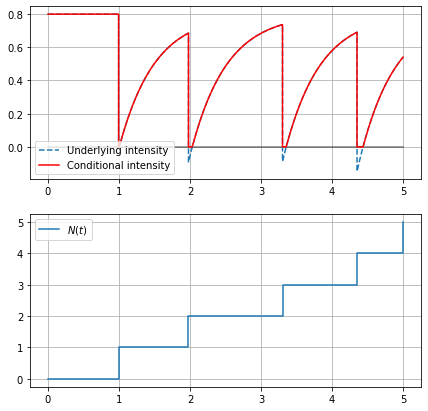

In [5]:
hawkes = exp_thinning_hawkes_marked(m=m,
                                    a=a, 
                                    b=b, 
                                    F = F ,
                                    arg_F = {'psi':1},
                                    phi=phi, 
                                    arg_phi = {'gamma': phi_arg},
                                    max_time = Tmax)


hawkes.simulate()

fig, ax = plt.subplots(2,1, figsize=(7,7))
hawkes.plot_intensity(ax =ax)

We now consider a multidimensionnal Hawkes process for which the intensity $\lambda_i$ of the i-th subprocess takes the form : $\begin{equation}
   \lambda_{i}(t) =   m_i + \sum_{j=1}^{d} \int_{(-\infty ,t)\times \mathcal{E}} a_{ij} e^{-b_i(t-s)} \phi_{\gamma, \psi}(\kappa) N^j(ds \times d\kappa),
\end{equation}$

with $\kappa$ beeing i.i.d. random variable with a  c.d.f $F_\psi$,a dmitiing a density $f_\psi$.

In [6]:
m = np.array([0.5, 0.2]).reshape((2,1))
a = np.array([[0.4, 0.2,], 
                  [-0.4, 0.3]] )
b = np.array([[1],[1.5]])


Tmax = 10
phi_arg = 0.5

def F(mark,time,psi):
    return(scipy.stats.expon.cdf(mark, scale = psi))

def phi(mark, gamma, psi):
    return((psi-gamma)/psi*np.exp(mark*gamma))

def f(mark,t, psi):
    return(psi*np.exp(-psi*mark))

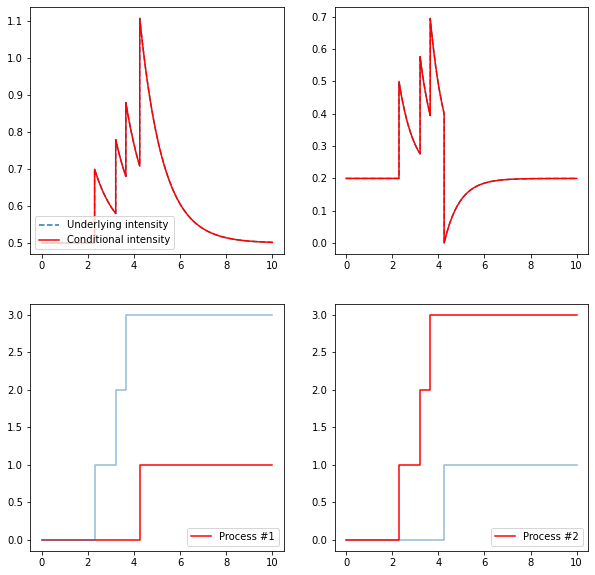

In [7]:
hawkes_multi = multivariate_exponential_hawkes_marked(m=m,
                                                      a=a, 
                                                      b=b, 
                                                      phi = phi, 
                                                      F= F, 
                                                      arg_phi={'gamma':phi_arg}, 
                                                      arg_F={'psi': 2}, 
                                                      max_time=10)

hawkes_multi.simulate()

fig,ax = plt.subplots(2,2, figsize = (10,10))
hawkes_multi.plot_intensity(ax = ax)

# Apply testing procedure

We present here the code use to apply different test procedure on Hawkes process. 

## Test on one coefficient

Simulation of 500 repetition of a bidimensionnal Hawkes process.

In [7]:
from functions.hawkes_process import *
from functions.GOF import *
from functions.compensator import *
from functions.estimator_class import loglikelihood_estimator_bfgs
from functions.estimator_class_multi_rep import *
from functions.multivariate_exponential_process import *
import scipy

In [13]:
np.random.seed(1)

In [14]:
## simualtion of the observations

m = np.array([0.5, 0.8]).reshape((2,1))
a = np.array([[0.4, 0.2], 
                  [0.4, 0.3]] )
b = np.array([[1],[1.5]])


tList = []

for k in range(50):
    process = multivariate_exponential_hawkes( m=m, a=a, b=b , max_time=500)
    process.simulate()
    tList += [process.timestamps]

In [15]:
estimator = estimator_multidim_multi_rep(dimension=2)
estimator.fit(tList)

array([0.59257219, 0.97855874, 0.74219063, 0.12923264, 0.38346765,
       0.3443456 , 5.78601946, 2.81278343])

In [16]:
stat = estimator.test_one_coeff(3,0.4)  
print(stat)

{'estimatorList': array([-0.19206164, -0.3004491 ,  0.07308072, -0.35598978, -0.23063115,
       -0.18004262, -0.14391122, -0.37344448, -0.3447764 ,  0.19451985,
       -0.35171841, -0.00668331, -0.31467381, -0.10891844, -0.16384405,
       -0.38580516, -0.19620722, -0.16011393,  0.33174512, -0.18553084,
       -0.09607226, -1.10967004, -0.21926285, -0.02489827,  0.21295378,
       -0.12867825,  3.30779636, -0.15130432, -0.29509348, -0.19994384,
       -0.54502157, -0.38198019,  0.01881764, -0.27282315, -6.16959151,
       -0.13996926, -0.1970866 , -0.33184314, -0.19377056, -0.15546356,
        0.04545619, -0.05745435, -0.29739123, -0.18323499, -0.24655655,
       -0.10846548, -0.21778397, -0.30644984, -0.17147832, -0.04655952]), 'KStest_stat': 0.3908709426447923, 'KStest_pval': 2.1574222058984363e-07}


### Test of equality between coefficients 

In [18]:
stat = estimator.test_equality_coeff(6,7)

In [1]:
from contextlib import contextmanager
from rpy2.robjects.lib import grdevices
from IPython.display import Image, display
from rpy2 import robjects
import numpy as np
from rpy2.robjects.packages import importr

rqqconf = importr('qqconf')
rstats = importr('stats')

@contextmanager
def r_inline_plot(width=600, height=600, dpi=100):

    with grdevices.render_to_bytesio(grdevices.png, 
                                     width=width,
                                     height=height, 
                                     res=dpi) as b:

        yield

    data = b.getvalue()
    display(Image(data=data, format='png', embed=True))

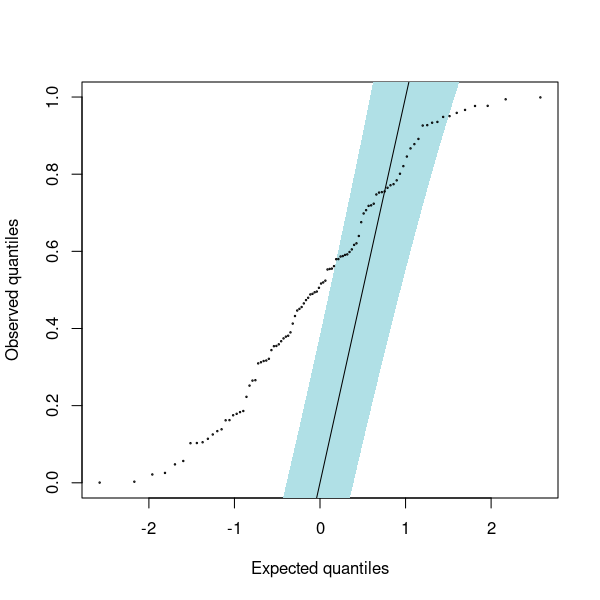

In [3]:
import rpy2.robjects as robjects

robjects.r('''
           uniformity_test <- function(pvals, alpha = 0.05)
           {
           qq_conf_plot(pvals, 
           distribution = qunif, 
           alpha = alpha,
           dparams = list('min' =0,'max'=1), 
           polygon_params = list( col='powderblue', border = FALSE),
           points_params = list(cex=0.2)
           )}
           ''')


robjects.r('''
           normality_test <- function(pvals, alpha = 0.05)
           {
           qq_conf_plot(pvals, 
           distribution = qnorm, 
           alpha = alpha,
           dparams = list('mean' =0,'sd'=1), 
           polygon_params = list( col='powderblue', border = FALSE),
           points_params = list(cex=0.2)
           )}
           ''')


uniformity_test = robjects.globalenv['uniformity_test']
normality_test = robjects.globalenv['normality_test']


set = np.random.uniform(0,1,100)
estimator_list = robjects.FloatVector(set)

with r_inline_plot():
    normality_test(estimator_list)


In [15]:
set = np.random.uniform(0,1,100)
estimator_list = robjects.FloatVector(set)




R[write to console]: Erreur dans as.character(substitute(distribution)) : 
  cannot coerce type 'closure' to vector of type 'character'



RRuntimeError: Erreur dans as.character(substitute(distribution)) : 
  cannot coerce type 'closure' to vector of type 'character'


### Test on the model used for estimation

In [17]:
### data generation
m=1
a = -0.6
b = 2.1
Tmax = 500


NbSample = 500
SubSample = int(NbSample**(2/3) )



tList = []

for k in range(5000):
    hawkes_ex =   exp_thinning_hawkes(m=m, a = -2, b=b, max_time=Tmax)
    hawkes_ex.simulate()
    tList += [hawkes_ex.timestamps]

#%%


learner = estimator_unidim_multi_rep()
learner.fit(tList)


KeyboardInterrupt: 

### Test of the self-exiting assumption

We test here the null hypothesis $$\mathcal{H}_0 : \text{data are i.i.d represetation of a poisson model with an unknown parameter} $$

Text(0.5, 1.0, 'Pval density, uniformity test : pval_{KS}=3.653907510420182e-169')

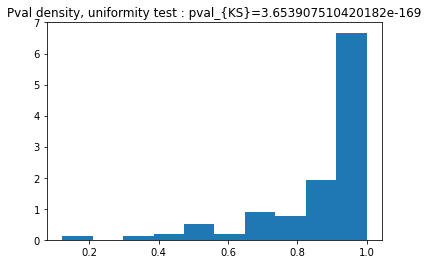

In [12]:
stats_poisson = learner.GOF_bootstrap(compensator_func=poisson_compenasator, sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)

plt.figure()
plt.clf()
plt.hist(stats_poisson['pvalList'], density = True)
plt.title(r'Pval density, uniformity test : $pval_{KS}$='+ f"{stats_poisson['KStest_pval']}")

In [7]:
stats_hawkes = learner.GOF_bootstrap(sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)
print(stats_hawkes)

{'pvalList': [0.7344493106997888, 0.6131163831448176, 0.965919864424957, 0.6826387985780804, 0.8743462775283406, 0.12566987081971873, 0.23691482105189993, 0.2618903239547488, 0.6264325876636752, 0.07399099602239395, 0.7129245493637401, 0.02369167764436339, 0.677079748660951, 0.1260327757812503, 0.3354883276847692, 0.09921514658605035, 0.5745674422004581, 0.35668142905956063, 0.7247670461687512, 0.5588426635211818, 0.02783689104024854, 0.18099152410928324, 0.9599131191760427, 0.10909349271450944, 0.3431104225096324, 0.29699577835973057, 0.9690352434407935, 0.3692005946583084, 0.9005055747676762, 0.35135165136360097, 0.005888673392912372, 0.8537242087000475, 0.09858363472789834, 0.10089942294862438, 0.6826387985780804, 0.09764959805343215, 0.48181924729339565, 0.24875991226846803, 0.763778701175933, 0.03456008713172275, 0.3047069313634295, 0.28399656309523175, 0.2633213528561139, 0.7883909416487942, 0.6192022142241607, 0.24875991226846803, 0.8597877648329189, 0.32303108578293255, 0.52552

### Test of the inhibition assumption

We test here the null hypothesis $$\mathcal{H}_0 : \text{data are i.i.d represetation of a hawkes model inhibition} $$

In [8]:
learner_hawkes_ex = estimator_unidim_multi_rep(a_bound=0)
learner_hawkes_ex.fit(tList)

array([1.04650399, 0.        , 1.        ])

In [9]:
stats_hawkes_ex = learner_hawkes_ex.GOF_bootstrap(sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)

In [10]:
print(stats_hawkes_ex)

{'pvalList': [0.6813320175601797, 0.9175812921665082, 0.9178920366620701, 0.8280737839635345, 0.9636398214993672, 0.7348220717263811, 0.9668550456227899, 0.7311591115041574, 0.6755114841723926, 0.9589307861362428, 0.7532471680232764, 0.8139020139493105, 0.9773364249157729, 0.9529114436513504, 0.9994890032335063, 0.9809906370267099, 0.9740392620712773, 0.70948608945328, 0.8679310045268054, 0.6291109627883011, 0.7135582390228998, 0.7562747708613868, 0.9752792001835617, 0.9977505003997893, 0.9995691196827152, 0.999998906292019, 0.9999731872689085, 0.9992313356156641, 0.9998295960510668, 0.9992313356156641, 0.5476446080710917, 0.9939962843513388, 0.9169456012247554, 0.7311591115041574, 0.9937523886570242, 0.9892407364262856, 0.9999792471221824, 0.9699451397316994, 0.8735529840090837, 0.9949026010973008, 0.837848852898493, 0.9947256846695997, 0.9893747000319476, 0.910821406805822, 0.8137529158960651, 0.930751030081109, 0.8099315877266563, 0.8170167449772383, 0.9994687963072842, 0.9968374630

### Test of the marked assumpation

We test here the null hypothesis $$\mathcal{H}_0 : \text{data are i.i.d represetation of a marked hawkes model} $$

# Real dataset